<a href="https://colab.research.google.com/github/plaban1981/KMEANS-Jaccard-score/blob/master/Elbow_Method_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving NewCLuster.csv to NewCLuster.csv


{'NewCLuster.csv': b'Date,FirstNotifiedAt,SiteID,InstanceID,Clusters\r\n2017-07-12 10:37:02,1499855822,3684492,24134,23\r\n2017-03-18 10:33:13,1489833193,3606427,23473,96\r\n2017-02-16 09:14:11,1487236451,3606357,23911,92\r\n2017-09-19 04:09:56,1505794196,3658175,24092,84\r\n2017-07-21 22:22:45,1500675765,3687379,23634,44\r\n2017-09-22 05:10:55,1506057055,3658215,23878,1\r\n2016-12-14 05:41:45,1481694105,3658210,24048,19\r\n2017-09-27 15:47:15,1506527235,3689247,23876,74\r\n2017-03-02 23:04:26,1488495866,3658208,23939,32\r\n2017-10-03 05:07:40,1507007260,3685134,24149,41\r\n2017-10-03 05:35:05,1507008905,3658188,23997,41\r\n2016-12-13 02:17:20,1481595440,3710620,24123,19\r\n2017-05-31 06:10:43,1496211043,3660676,23639,27\r\n2017-03-21 20:30:46,1490128246,3607280,23502,2\r\n2017-10-04 01:48:31,1507081711,3658212,24061,41\r\n2017-03-10 22:01:46,1489183306,3658152,23495,45\r\n2017-05-14 02:52:42,1494730362,3607465,23875,15\r\n2017-08-21 20:05:02,1503345902,3689326,23806,33\r\n2017-09-20 1

In [0]:
import pandas as pd
df = pd.read_csv('NewCLuster.csv')

In [4]:
df.head()

,Date,FirstNotifiedAt,SiteID,InstanceID,Clusters
0,2017-07-12 10:37:02,1499855822,3684492,24134,23
1,2017-03-18 10:33:13,1489833193,3606427,23473,96
2,2017-02-16 09:14:11,1487236451,3606357,23911,92
3,2017-09-19 04:09:56,1505794196,3658175,24092,84
4,2017-07-21 22:22:45,1500675765,3687379,23634,44


In [0]:
X = df[['FirstNotifiedAt','SiteID','InstanceID']]

In [7]:
X['Date'] = pd.to_datetime(X['FirstNotifiedAt'], unit = 's')
X['Hour'] = X['Date'].dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
X.head()

,FirstNotifiedAt,SiteID,InstanceID,Date,Hour
0,1499855822,3684492,24134,2017-07-12 10:37:02,10
1,1489833193,3606427,23473,2017-03-18 10:33:13,10
2,1487236451,3606357,23911,2017-02-16 09:14:11,9
3,1505794196,3658175,24092,2017-09-19 04:09:56,4
4,1500675765,3687379,23634,2017-07-21 22:22:45,22


## Bring the date column as the first columns of the dataframe

In [0]:
df_sample = X[pd.unique(['Date']+X.columns.values.tolist()).tolist()]

In [12]:
df_sample.head()

,Date,FirstNotifiedAt,SiteID,InstanceID,Hour
0,2017-07-12 10:37:02,1499855822,3684492,24134,10
1,2017-03-18 10:33:13,1489833193,3606427,23473,10
2,2017-02-16 09:14:11,1487236451,3606357,23911,9
3,2017-09-19 04:09:56,1505794196,3658175,24092,4
4,2017-07-21 22:22:45,1500675765,3687379,23634,22


In [0]:
df_data =  df_sample.copy()
df_data.drop('Hour',axis=1,inplace=True)
df_data = df_data.set_index('Date')

In [51]:
df_data = df_data.rename(columns={'FirstNotifiedAt':'Unix Epoch Time','SiteID':'Server Site id','InstanceID':'Server Instance id'})
df_data.head()

,Unix Epoch Time,Server Site id,Server Instance id
Date,,,
2017-07-12 10:37:02,1499855822,3684492,24134
2017-03-18 10:33:13,1489833193,3606427,23473
2017-02-16 09:14:11,1487236451,3606357,23911
2017-09-19 04:09:56,1505794196,3658175,24092
2017-07-21 22:22:45,1500675765,3687379,23634


In [0]:
data = df_data.values.tolist()

In [53]:
data[:5]

[[1499855822, 3684492, 24134],
 [1489833193, 3606427, 23473],
 [1487236451, 3606357, 23911],
 [1505794196, 3658175, 24092],
 [1500675765, 3687379, 23634]]

In [0]:
from sklearn.cluster import KMeans
#cluster_range= range(100,115)
cluster_range= [5,10,12,15,17,20,23,27,25]
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( data )
  cluster_errors.append( clusters.inertia_ )

In [0]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [56]:
clusters_df

,num_clusters,cluster_errors
0,5,2.424630e+16
1,10,4.045301e+15
2,12,2.948990e+15
3,15,1.836717e+15
4,17,1.346171e+15
5,20,9.256136e+14
6,23,7.491650e+14
7,27,5.347274e+14
8,25,6.267080e+14


Text(0.5, 1.0, 'elbow curve')

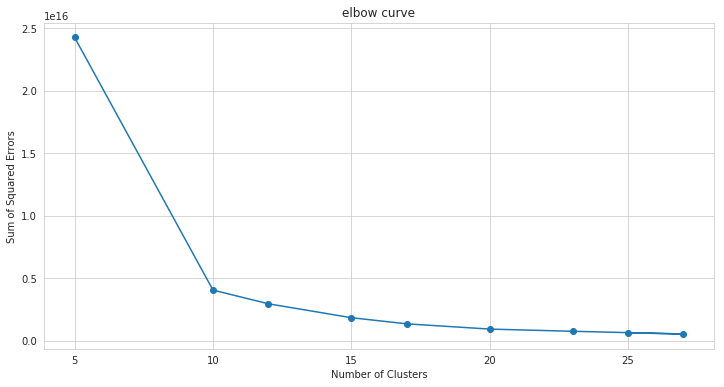

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('elbow curve')

In [0]:
kmeans = KMeans( 10 )

In [59]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
prediction = kmeans.predict(data)

In [0]:
clusters = list(prediction)

In [0]:
df_data['Cluster'] = clusters

In [64]:
df_data.head()

,Unix Epoch Time,Server Site id,Server Instance id,Cluster
Date,,,,
2017-07-12 10:37:02,1499855822,3684492,24134,0
2017-03-18 10:33:13,1489833193,3606427,23473,4
2017-02-16 09:14:11,1487236451,3606357,23911,4
2017-09-19 04:09:56,1505794196,3658175,24092,6
2017-07-21 22:22:45,1500675765,3687379,23634,0
